In [33]:
#Dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=o2Saturation.csv
#Attribute Info:
'''
Age : Age of the patient
Sex : Sex of the patient
exng: exercise induced angina (1 = yes; 0 = no)
caa: number of major vessels (0-3)
cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalachh : maximum heart rate achieved
oldpeak : ST depression induced by exercise relative to rest 
output : 0= less chance of heart attack 1= more chance of heart attack
'''

"\nAge : Age of the patient\nSex : Sex of the patient\nexng: exercise induced angina (1 = yes; 0 = no)\ncaa: number of major vessels (0-3)\ncp : Chest Pain type chest pain type\n    Value 1: typical angina\n    Value 2: atypical angina\n    Value 3: non-anginal pain\n    Value 4: asymptomatic\ntrtbps : resting blood pressure (in mm Hg)\nchol : cholestoral in mg/dl fetched via BMI sensor\nfbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\nrestecg : resting electrocardiographic results\n    Value 0: normal\n    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\nthalachh : maximum heart rate achieved\noutput : 0= less chance of heart attack 1= more chance of heart attack\n"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Checking column info like null counts and datatypes. There are no null values needing to be cleaned up in this dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Setting appropriate columns as category types
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exng'] = df['exng'].astype('category')
df['output'] = df['output'].astype('category')

Text(0, 0.5, 'Frequency')

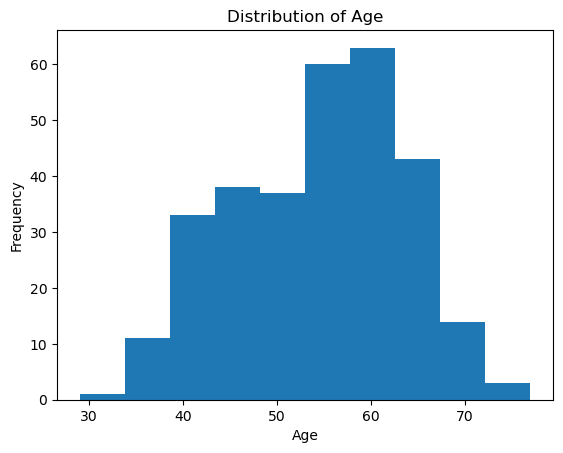

In [7]:
#Histogram for Age 
plt.hist(df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

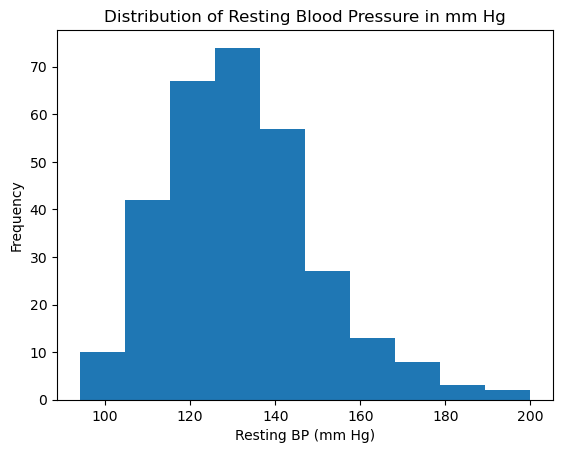

In [8]:
#Histogram for Resting Blood Pressure 
plt.hist(df['trtbps'])
plt.title('Distribution of Resting Blood Pressure in mm Hg')
plt.xlabel('Resting BP (mm Hg)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

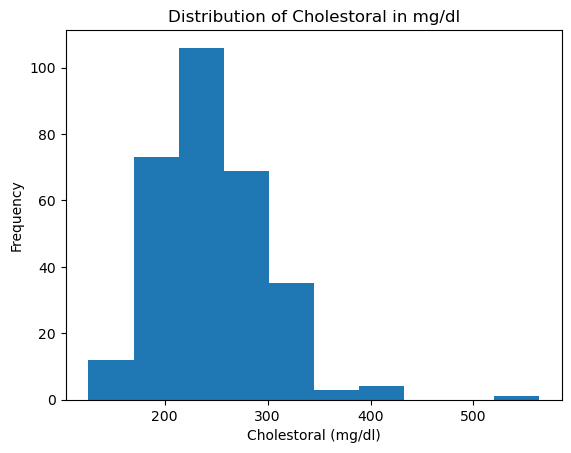

In [9]:
#Histogram for Cholestoral
plt.hist(df['chol'])
plt.title('Distribution of Cholestoral in mg/dl')
plt.xlabel('Cholestoral (mg/dl)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

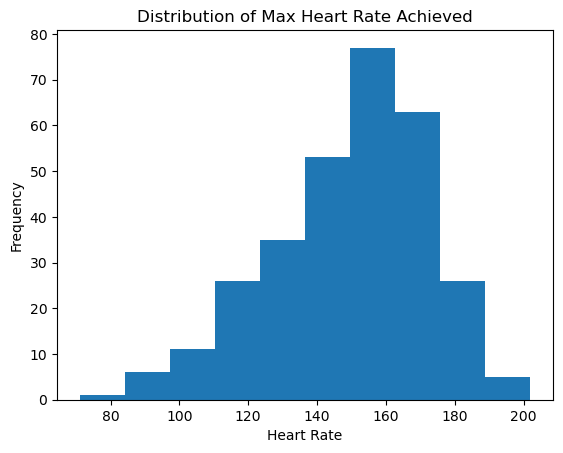

In [10]:
#Histogram for Max Heart Rate Achieved
plt.hist(df['thalachh'])
plt.title('Distribution of Max Heart Rate Achieved')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

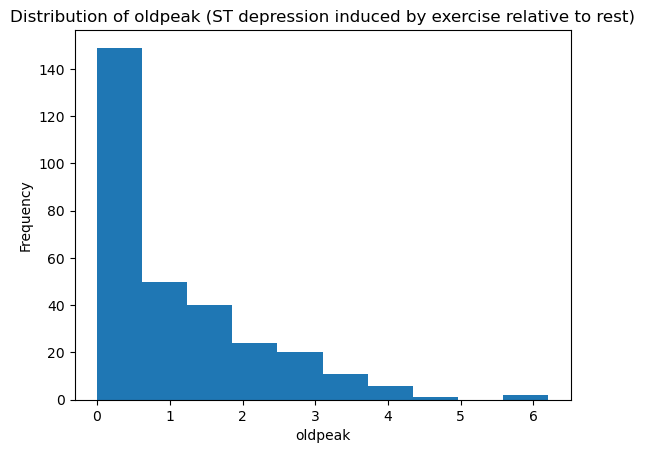

In [11]:
#Histogram for oldpeak 
plt.hist(df['oldpeak'])
plt.title('Distribution of oldpeak (ST depression induced by exercise relative to rest)')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

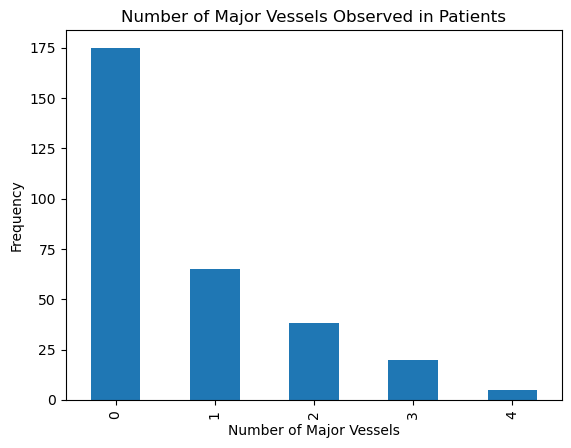

In [34]:
#Bar Chart for Number of Major Vessels 
df['caa'].value_counts().plot(kind='bar')
plt.title('Number of Major Vessels Observed in Patients')
plt.xlabel('Number of Major Vessels')
plt.ylabel('Frequency')

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

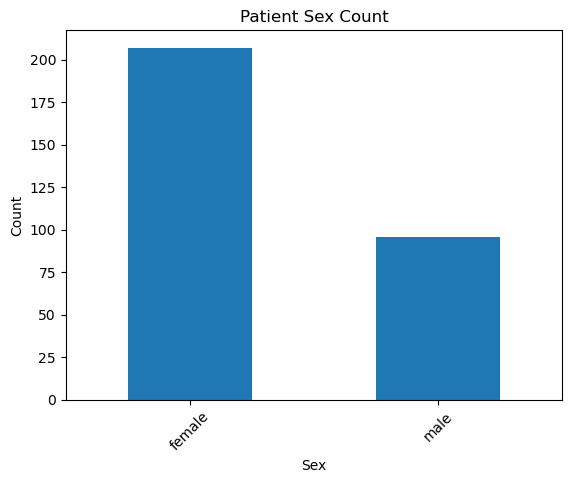

In [36]:
#Bar Chart for Sex 
df['sex'].replace([0,1],['male','female'],inplace=True)
df['sex'].value_counts().plot(kind='bar')
plt.title('Patient Sex Count')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'asymptomatic'),
  Text(1, 0, 'atypical agina'),
  Text(2, 0, 'typical angina'),
  Text(3, 0, 'non-anginal pain')])

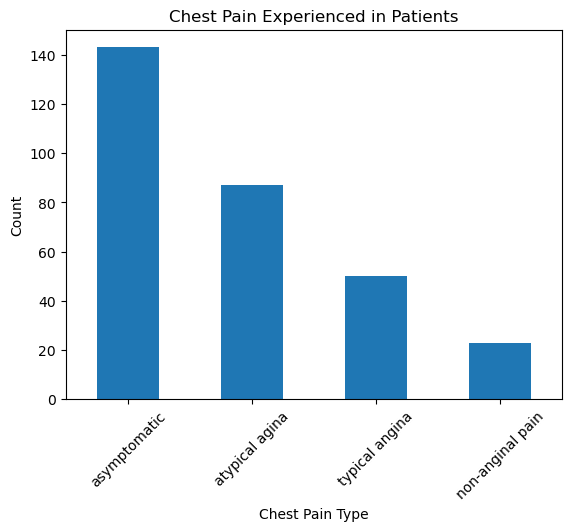

In [38]:
#Bar Chart for Chest Pain 
df['cp'].replace([0,1,2,3],['asymptomatic','typical angina','atypical agina','non-anginal pain'],inplace=True)
df['cp'].value_counts().plot(kind='bar')
plt.title('Chest Pain Experienced in Patients')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'false'), Text(1, 0, 'true')])

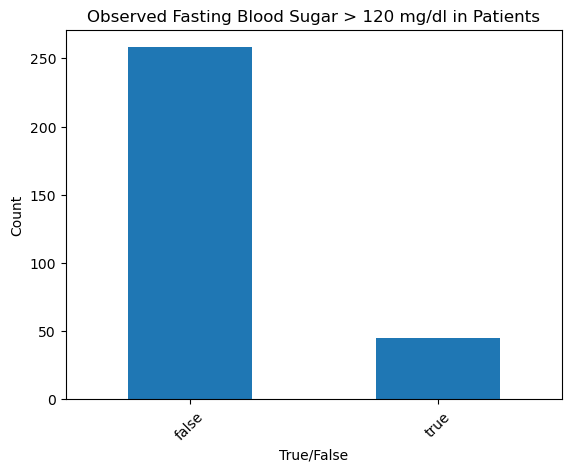

In [37]:
#Bar Chart for Fasting Blood Sugar
df['fbs'].replace([0,1],['false','true'],inplace=True)
df['fbs'].value_counts().plot(kind='bar')
plt.title('Observed Fasting Blood Sugar > 120 mg/dl in Patients')
plt.xlabel('True/False')
plt.ylabel('Count')
plt.xticks(rotation = 45)

(array([0, 1, 2]),
 [Text(0, 0, 'ST-T Wave Abnormality'),
  Text(1, 0, 'normal'),
  Text(2, 0, 'Probable/Definite Ventricular Hypertrophy')])

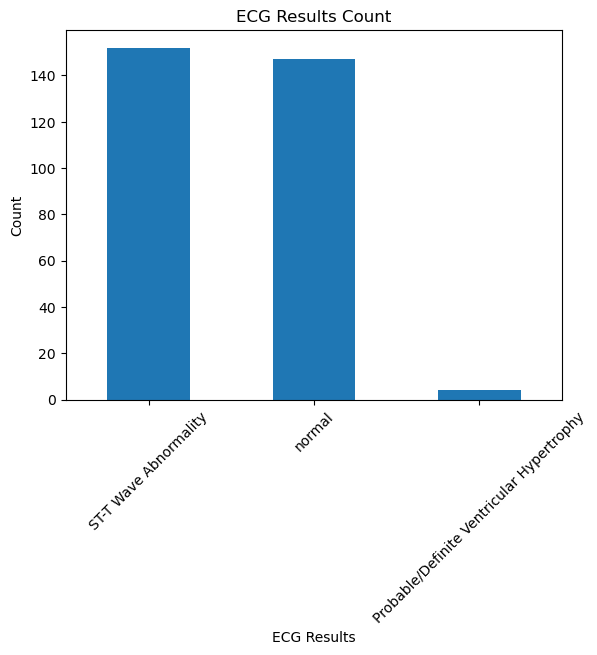

In [19]:
#Bar Chart for Resting ECG Results 
df['restecg'].replace([0,1,2],['normal','ST-T Wave Abnormality','Probable/Definite Ventricular Hypertrophy'],inplace=True)
df['restecg'].value_counts().plot(kind='bar')
plt.title('ECG Results Count')
plt.xlabel('ECG Results')
plt.ylabel('Count')
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

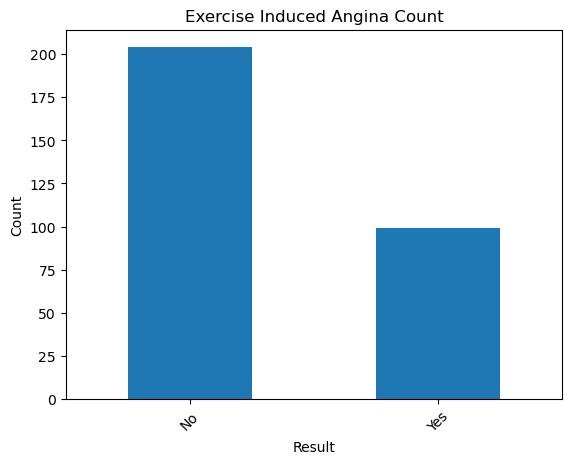

In [20]:
#Bar Chart for Exercise Induced Angina
df['exng'].replace([0,1],['No','Yes'],inplace=True)
df['exng'].value_counts().plot(kind='bar')
plt.title('Exercise Induced Angina Count')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, 'High'), Text(1, 0, 'Low')])

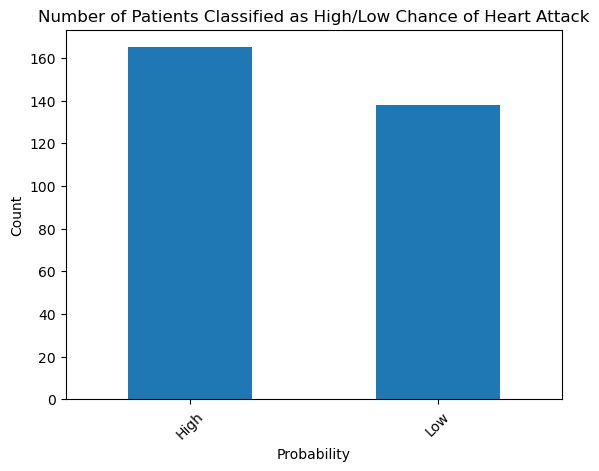

In [30]:
#Bar Chart for Target/Output
df['output'].replace([0,1],['Low','High'],inplace=True)
df['output'].value_counts().plot(kind='bar')
plt.title('Number of Patients Classified as High/Low Chance of Heart Attack')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.xticks(rotation = 45)

In [22]:
#Summary Stats for the data, displaying required max, min, mean. 
df.describe()

,age,trtbps,chol,thalachh,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,3.000000


In [23]:
#Median calculations for dataset 
df[['age','trtbps','chol','thalachh','oldpeak','slp','caa','thall']].median()

age          55.0
trtbps      130.0
chol        240.0
thalachh    153.0
oldpeak       0.8
slp           1.0
caa           0.0
thall         2.0
dtype: float64

Text(0.5, 1.0, 'Heart Attack Dataset Box Plots')

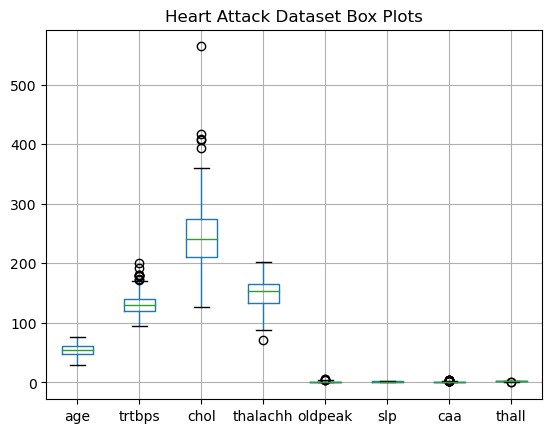

In [24]:
#Boxplots for dataset, depicting outliers as circles
df.boxplot()
plt.title('Heart Attack Dataset Box Plots')

In [58]:
#removing chol outlier, since it is an extreme value that will affect the EDA 
df.drop(df[df['chol']>500].index, inplace=True)

Text(0.5, 1.0, 'Heart Attack Dataset Box Plots')

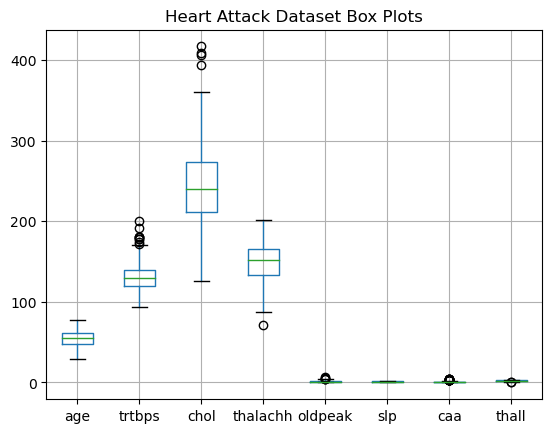

In [60]:
#Boxplots for dataset, depicting outliers as circles; removed Chol outlier
df.boxplot()
plt.title('Heart Attack Dataset Box Plots')

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>,
        <AxesSubplot:xlabel='thalachh', ylabel='trtbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trtbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trtbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalachh', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='thalachh'>,
        <AxesSubplot:xlabel='trtbps', ylabel='thalachh'>,
        <AxesSubplot:xlabel='chol', ylabel='thalachh'>,
        <AxesSubplo

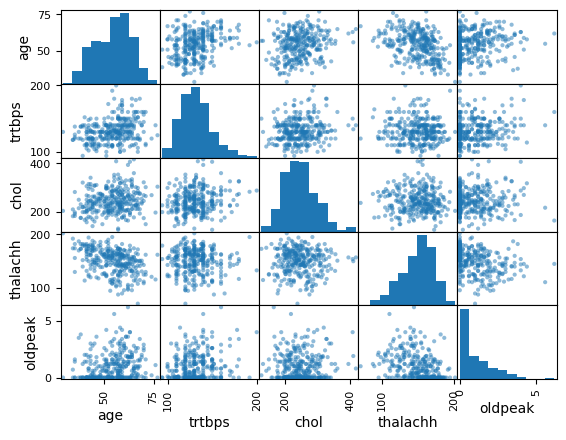

In [61]:
#Scatterplot Matrix for Numeric Variables
pd.plotting.scatter_matrix(df[['age','trtbps','chol','thalachh','oldpeak']])

In [62]:
#Splitting data into two groups. One with higher chances for heart attack people and one with lower chances. 
df_high = df.loc[df['output']=='High']
df_low = df.loc[df['output']=='Low']

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>,
        <AxesSubplot:xlabel='thalachh', ylabel='trtbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trtbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trtbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalachh', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='thalachh'>,
        <AxesSubplot:xlabel='trtbps', ylabel='thalachh'>,
        <AxesSubplot:xlabel='chol', ylabel='thalachh'>,
        <AxesSubplo

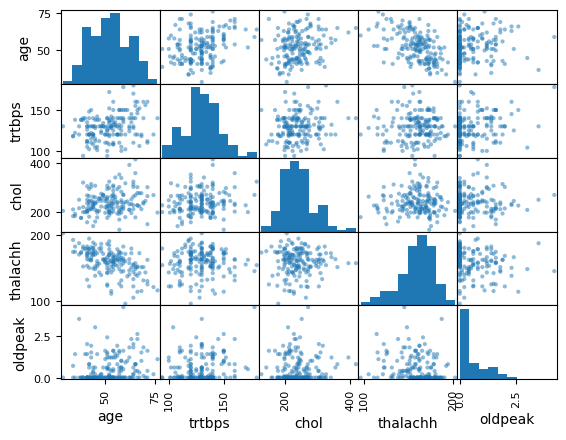

In [63]:
pd.plotting.scatter_matrix(df_high[['age','trtbps','chol','thalachh','oldpeak']])

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>,
        <AxesSubplot:xlabel='thalachh', ylabel='trtbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trtbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trtbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalachh', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='thalachh'>,
        <AxesSubplot:xlabel='trtbps', ylabel='thalachh'>,
        <AxesSubplot:xlabel='chol', ylabel='thalachh'>,
        <AxesSubplo

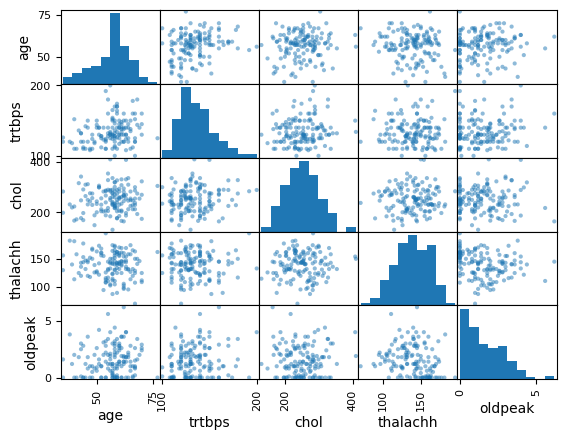

In [64]:
pd.plotting.scatter_matrix(df_low[['age','trtbps','chol','thalachh','oldpeak']])

Text(0.5, 1.0, 'Correlation Heatmap for Heart Attack Dataset')

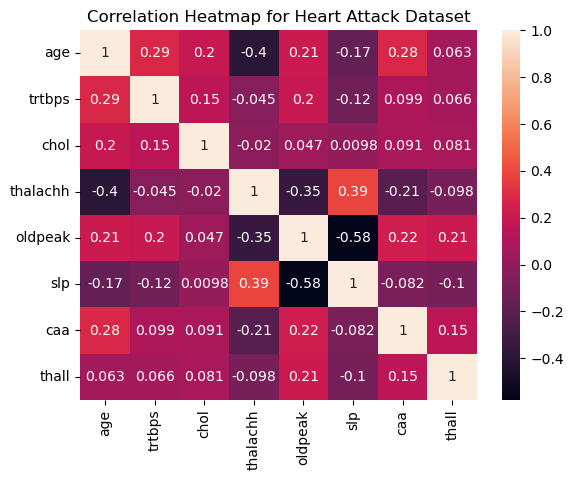

In [71]:
#Correlation heat map to check for any linearly correlated variables
import seaborn as sns
df_high.corr()
heatmap = sns.heatmap(df.corr(),annot = True)
heatmap.set_title('Correlation Heatmap for Heart Attack Dataset')

#There does not seem to be any linearly correlated variables

Text(0.5, 0, 'ST Depression Magnitude')

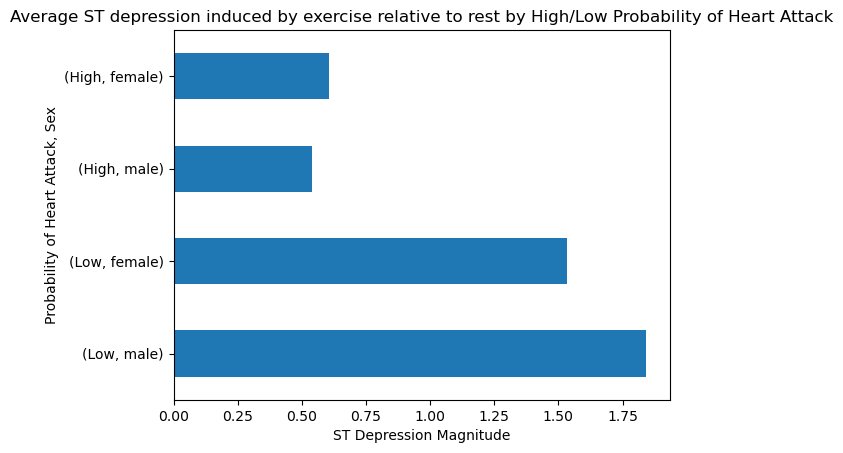

In [134]:
#Grouping data by output (low vs high probability of heart attack) and by sex
#Looking at oldpeak data, since histograms above shows a difference in distributions for this variable
df.groupby(['output','sex'])['oldpeak'].mean().plot(kind='barh')
plt.title('Average ST depression induced by exercise relative to rest by High/Low Probability of Heart Attack')
plt.ylabel('Probability of Heart Attack, Sex')
plt.xlabel('ST Depression Magnitude')

Text(0, 0.5, 'Frequency')

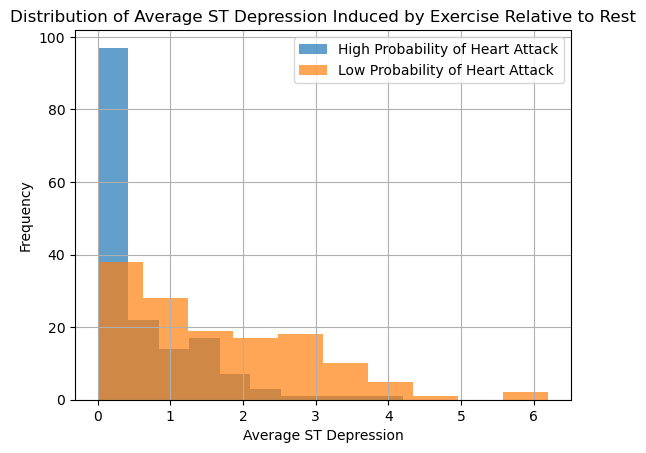

In [165]:
df.loc[df['output']=='High']['oldpeak'].hist(alpha=.7, label = 'High Probability of Heart Attack')
df.loc[df['output']=='Low']['oldpeak'].hist(alpha=.7, label = 'Low Probability of Heart Attack')
plt.legend()
plt.title('Distribution of Average ST Depression Induced by Exercise Relative to Rest')
plt.xlabel('Average ST Depression')
plt.ylabel('Frequency')

(array([0, 1, 2, 3]),
 [Text(0, 0, '(Low, male)'),
  Text(1, 0, '(Low, female)'),
  Text(2, 0, '(High, male)'),
  Text(3, 0, '(High, female)')])

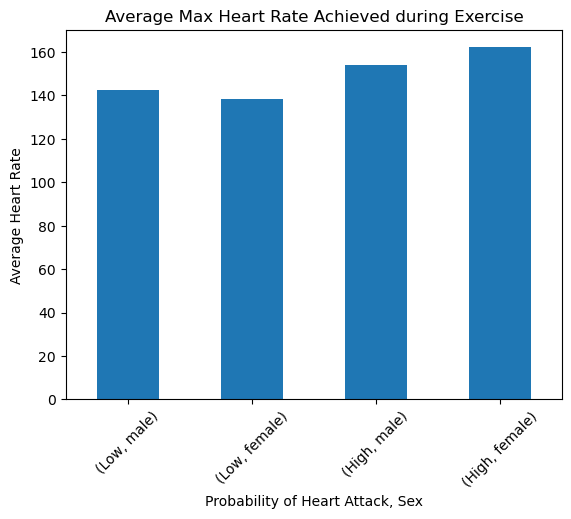

In [140]:
#Analyzing thalacch differences between high/low male/female groups
df.groupby(['output','sex'])['thalachh'].mean().plot(kind='bar')
plt.title('Average Max Heart Rate Achieved during Exercise')
plt.xlabel('Probability of Heart Attack, Sex')
plt.ylabel('Average Heart Rate')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(asymptomatic, Low)'),
  Text(1, 0, '(asymptomatic, High)'),
  Text(2, 0, '(typical angina, Low)'),
  Text(3, 0, '(typical angina, High)'),
  Text(4, 0, '(atypical agina, Low)'),
  Text(5, 0, '(atypical agina, High)'),
  Text(6, 0, '(non-anginal pain, Low)'),
  Text(7, 0, '(non-anginal pain, High)')])

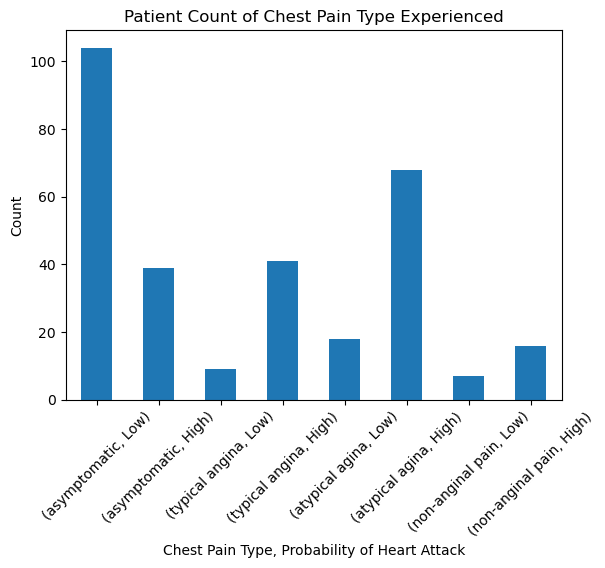

In [143]:
#identifying what cp category results in a higher chance of heart attack
df.groupby(['cp','output']).size().plot(kind='bar')
plt.title('Patient Count of Chest Pain Type Experienced')
plt.xlabel('Chest Pain Type, Probability of Heart Attack')
plt.ylabel('Count')
plt.xticks(rotation = 45)

In [112]:
#Counts for number of major vessels
print(df.groupby(['caa','output'])['output'].count())

caa  output
0    Low        45
     High      129
1    Low        44
     High       21
2    Low        31
     High        7
3    Low        17
     High        3
4    Low         1
     High        4
Name: output, dtype: int64


Text(0.5, 0, 'Number of Vessels')

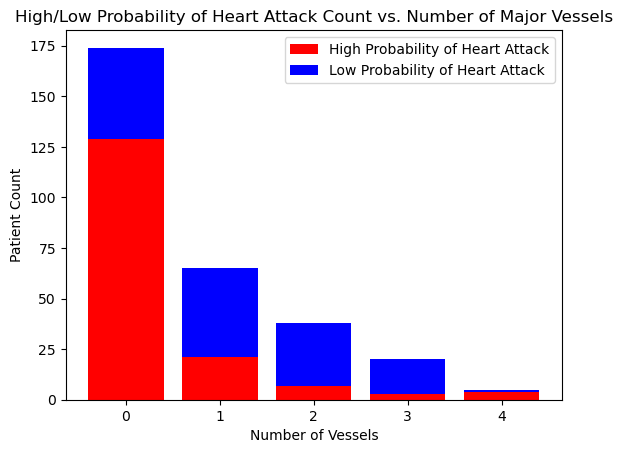

In [137]:
labels = [0, 1, 2, 3, 4]
high = [129, 21, 7, 3, 4]
low = [45, 44, 31, 17, 1]
plt.bar(labels, high, color = 'r', label = 'High Probability of Heart Attack')
plt.bar(labels, low, color = 'b', bottom = high, label = 'Low Probability of Heart Attack')
plt.legend()
plt.title('High/Low Probability of Heart Attack Count vs. Number of Major Vessels')
plt.ylabel('Patient Count')
plt.xlabel('Number of Vessels')

# Data Story 

# What factors indicate that you are succeptible to Heart Attacks?
#### With topics like heart disease and heart attacks being on the forefront of medical news, it is important to understand the factors that could indicate that you are more succeptible to heart attacks. Patient data used to categorize those who have a higher and lower probability of heart attack was used to identify some factors that you should be aware of. 

From a sample of 302 patients, the average maximum heart rate achieved during exercise was recorded. Looking at the count of patients stratified by high or low probability of heart attack and sex, it is observed that those who have higher max heart rates during exercise are those who have higher probability of heart attack. 

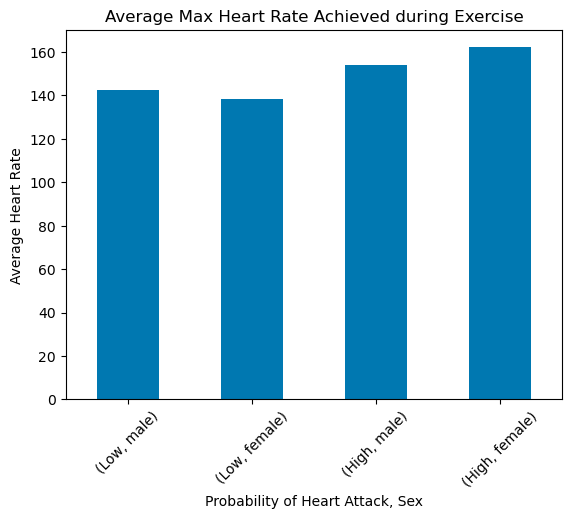

Anatomically, patients who have lower number of major vessels are more likely to experience a heart attack. The data below shows a higher proportion of patients bucketed in the high probability category as the number of major vessels decreased. 

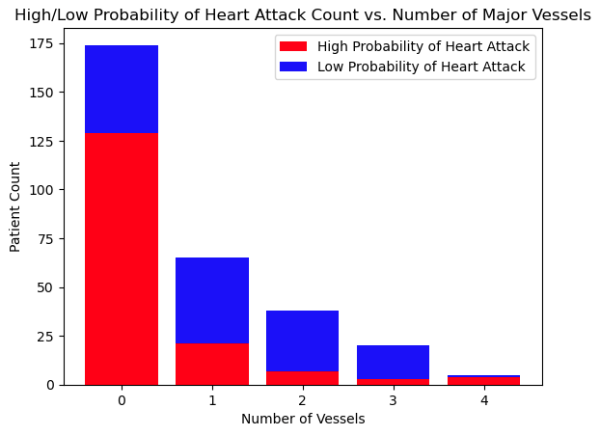

ECG readings for these patients before and after exercise were taken, and the distribution of the average ST segment depression induced by exercise relative to rest is seen below. The data was split into high and low probability for heart attack groups to illustrate the differences in their distributions. We see that those with higher chances of heart attack are more likely to have a lower average ST depression than those with lower chances of heart attack.   

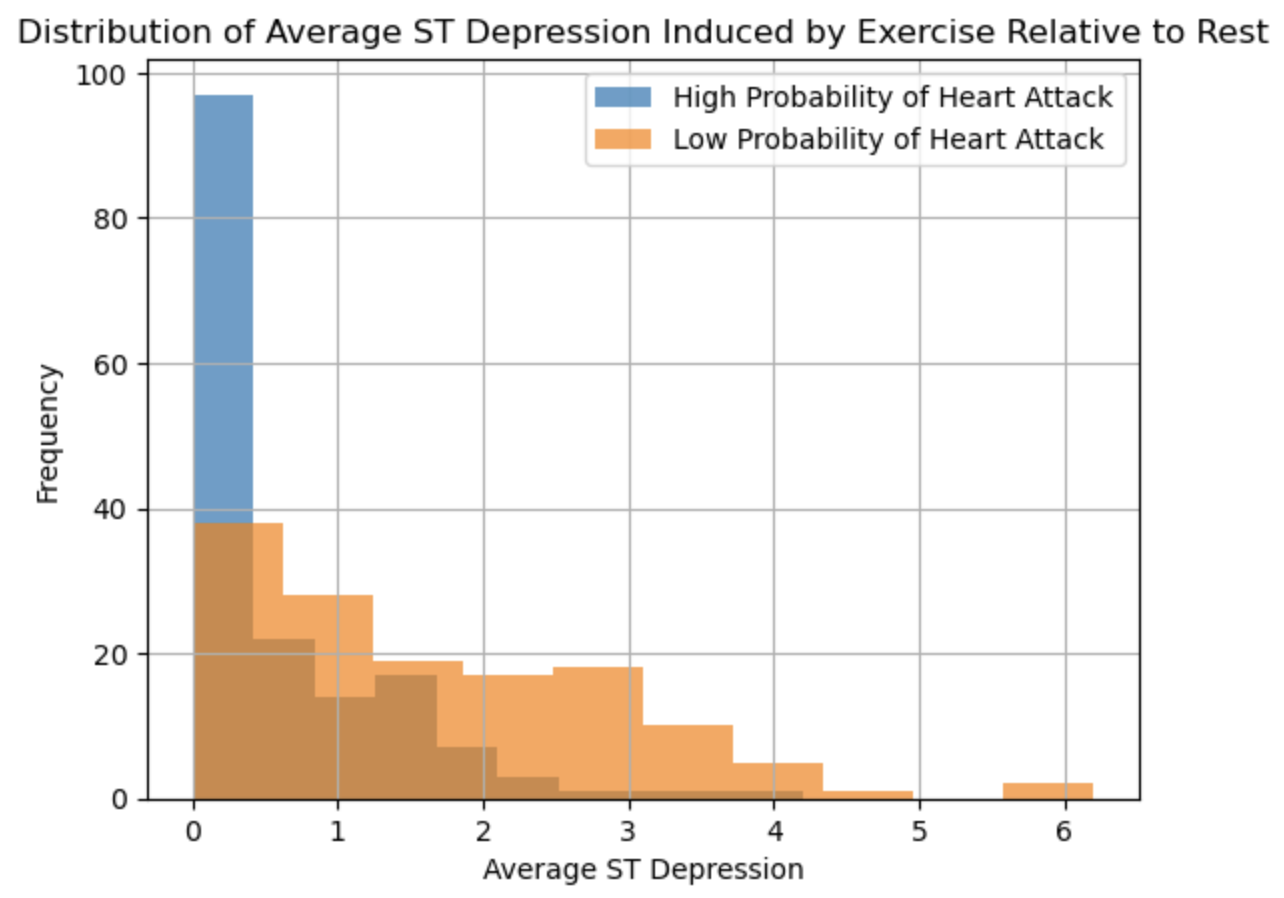